# sCake

sCAKE: semantic Connectivity Aware Keyword Extraction

Description:
============

The algorithms rank all the candidate keywords and present the output in descending order of SCScore. and does not define the number of candidates to be extracted as keywords.
Thus the user has to decide on the number of extracted keywords. sCAKE is designed for languages with support of sophisticated NLP tools, like English. This impementation of sCAKE is aimed for English language only. However, interested users may apply the appropriate NLP tools, if available, for the language of their interest.

Note: Resultant keywords may vary depending on the NLP tools used during different stages (stemmer, tokenizer, etc.). The original R Scripts for implementing sCAKE and LAKE method for single document keyword Extraction can be found here:
https://github.com/SDuari/sCAKE-and-LAKE

Pipeline:
=========
Store all documents in a folder called 'data' along with the following python scripts.
1. Run 'Create-position-info-sCAKE.py'.
2. Run 'Create-graph-sCAKE.py'.
3. Run 'InfluenceEvaluation.py'.
4. Run 'Word-score-with-PositionWeight-sCAKE.py'.
5. Run 'Construct-keyphrases-sCAKE.py' (for keyphrase generation).
OR
1. Execute the script 'Keyphrases_using_keywords.sh'.

The folder "SCScore_W" contains the keywords. Folder "KP-Preds" contains the keyphrases(the algorithm for constructing keyphrases has not been published and is experimental).

# 0. Create-position-info-sCAKE

In [207]:
! pip install nltk

In [208]:
import os
import re
import nltk
import string
import pandas as pd
from read_write_create import *
from nltk.stem import PorterStemmer 
import nltk
nltk.download('punkt')

global cwd, path, data_path

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mayan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [209]:
cwd = os.getcwd()
path = cwd
data_path = cwd + "/data"
create_folder(cwd, "positions")


c:\Users\mayan\OneDrive\Desktop\sCAKE & LAKE\sCAKE-in-Python/positions
Creation of the directory c:\Users\mayan\OneDrive\Desktop\sCAKE & LAKE\sCAKE-in-Python/positions failed


### preprocessing 

In [210]:
# Compile regular expressions to filter out numbers, punctuation, and Roman numerals from the text
numbers_ex = re.compile("[0-9]+(-[0-9]+)?")  # Matches numbers and number ranges
punctuation_ex = re.compile("[^a-z ]")  # Matches any character that is not a lowercase letter or space
roman_num_ex = re.compile("\\b[i|v|x|l|c|d|m]{1,3}\\b")  # Matches Roman numerals from I to MMM

# Read stopwords from a file (common words to be removed during processing)
stopwords = read_list_from_file(path, "stopwords.txt")

# Initialize a PorterStemmer for stemming words (reducing words to their root form)
ps = PorterStemmer()


print("create-position-info-sCake")
for every_file in (os.listdir(data_path)):
    
    print(every_file)
    text = read_text_from_file(data_path,every_file)
    
    ## pre-processing text
    text = text.strip()
    text = text.lower()
    text = re.sub(numbers_ex, '', text)
    text = re.sub(punctuation_ex, '', text)
    text = re.sub(roman_num_ex, '', text)
    
    words = nltk.word_tokenize(text)
    words = [i for i in words if i not in stopwords]
    words = [ps.stem(i) for i in words]
    
    selected_words = list(set(words))
    
    ## end of pre-processing
    
    N = len(words) +1
    posi = list()
    t = list()
    tf = list()
    
    for w in selected_words:        
        posw = [i for i, word in enumerate(words) if w == word]
        w_freq = len(posw)+1
        posw.append(N)
        t.append(w)
        tf.append(w_freq)
        posi.append(posw)
  
    #print(posi)
    
    data = dict()
    data["words"] = t
    data["tf"] = tf
    data["positions"] = posi
    
    df = pd.DataFrame(data=data)
    df.to_pickle(cwd+"/positions/"+every_file[:-4]+".pkl")
    

create-position-info-sCake
100_words.txt
1_test_sentence_semantic.txt
200_words.txt
2_test_sentence_non_semantic.txt
400_words.txt
50_words.txt
abstract_sCAKE_.txt
nakamura1997.txt
sCAKE_full_doc_.txt


# 1. Create-graph-sCAKE



In [211]:
#1.
import re
import string
import numpy as np
import pandas as pd
import networkx as nx
from scipy import sparse
from read_write_create import *
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer


### Helper functions for graph and text processing


In [212]:
# Convert a text to a list of sentences using NLTK's sentence tokenizer
def convert_text_to_sentences(text):
    return nltk.sent_tokenize(text)

# Select adjectives and nouns based on part-of-speech (POS) tags
def select_adj_noun(POS_tags):
    adj_ex = re.compile("JJ.?")  
    noun_ex = re.compile("NN.?.?") 
    selected_words = []
    
    # Check each word's POS tag, selecting only adjectives and nouns
    for word, tag in POS_tags:
        if adj_ex.match(tag) or noun_ex.match(tag):
            selected_words.append(word)
    
    return selected_words

# Create a graph using an adjacency matrix and node labels
def create_graph_with_adjmat(adjacency_matrix, labels):
    num_of_nodes = len(adjacency_matrix)
    
    # Find row and column indices where edges (connections) exist (non-zero in the matrix)
    rows, cols = np.where(adjacency_matrix > 0)
    edges = zip(rows.tolist(), cols.tolist())
    
    # Prepare nodes with labels
    nodes_with_labels = [(i, dict(labels=labels[i])) for i in range(num_of_nodes)]
    
    # Prepare weighted edges based on the adjacency matrix
    wted_edges = [(edge[0], edge[1], adjacency_matrix[edge[0], edge[1]]) for edge in edges]
    
    # Create a graph object using NetworkX and add nodes and weighted edges
    gr = nx.Graph()
    gr.add_nodes_from(nodes_with_labels)
    gr.add_weighted_edges_from(wted_edges)
    
    # uncomment  to visualize the graph
    nx.draw(gr, node_size=500, labels=labels, with_labels=True)
    plt.show()
    
    return gr

# Placeholder function (to be developed later) for creating a graph with an edge list
def create_graph_with_edgelist():
    return 1


c:\Users\mayan\OneDrive\Desktop\sCAKE & LAKE\sCAKE-in-Python/graphs
Creation of the directory c:\Users\mayan\OneDrive\Desktop\sCAKE & LAKE\sCAKE-in-Python/graphs failed
c:\Users\mayan\OneDrive\Desktop\sCAKE & LAKE\sCAKE-in-Python/edgelists
Creation of the directory c:\Users\mayan\OneDrive\Desktop\sCAKE & LAKE\sCAKE-in-Python/edgelists failed
Create-graph-sCake
100_words.txt


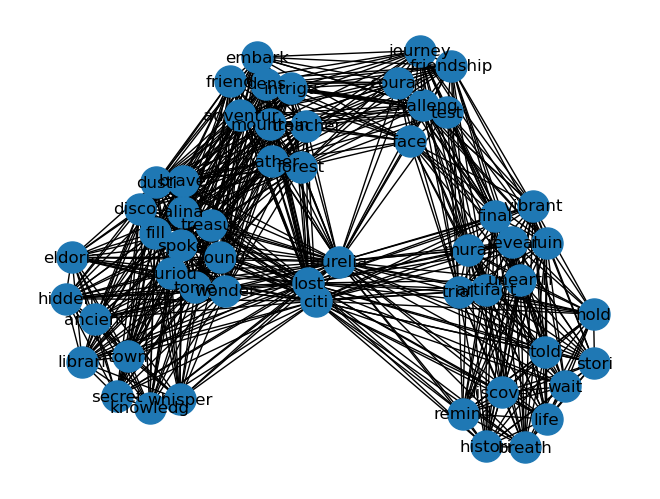

1_test_sentence_semantic.txt


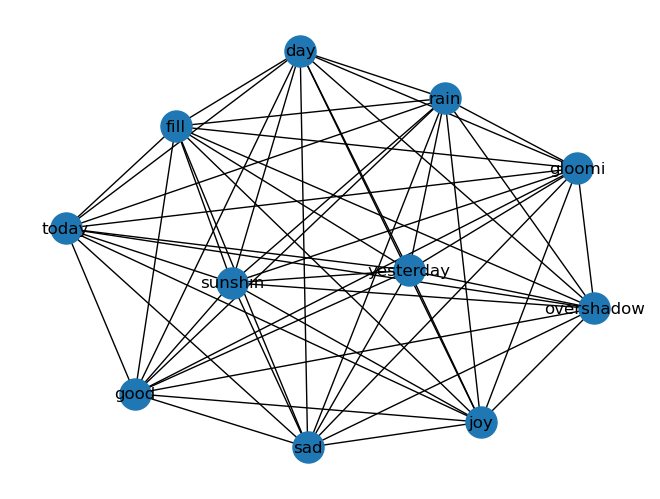

200_words.txt


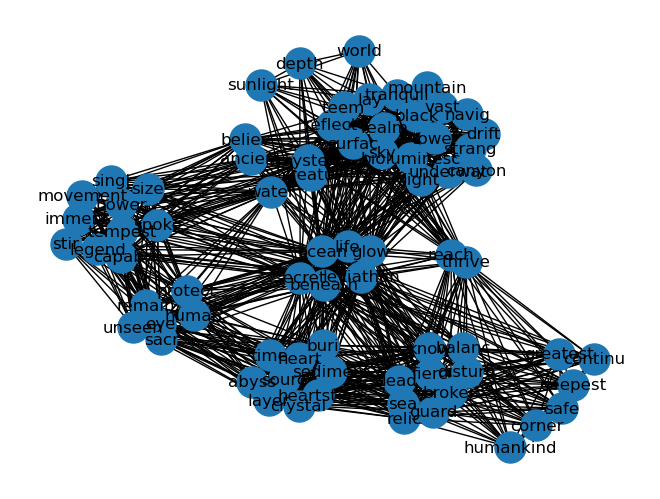

2_test_sentence_non_semantic.txt


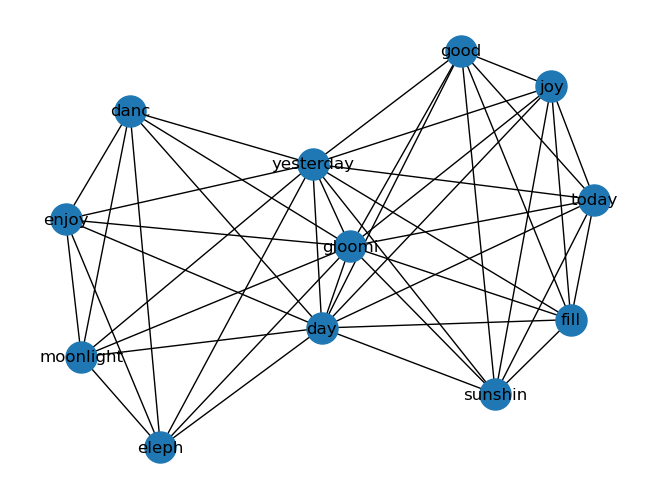

400_words.txt


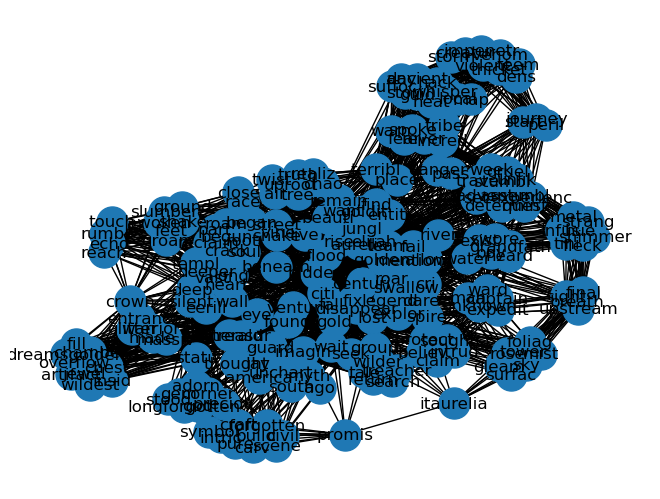

50_words.txt


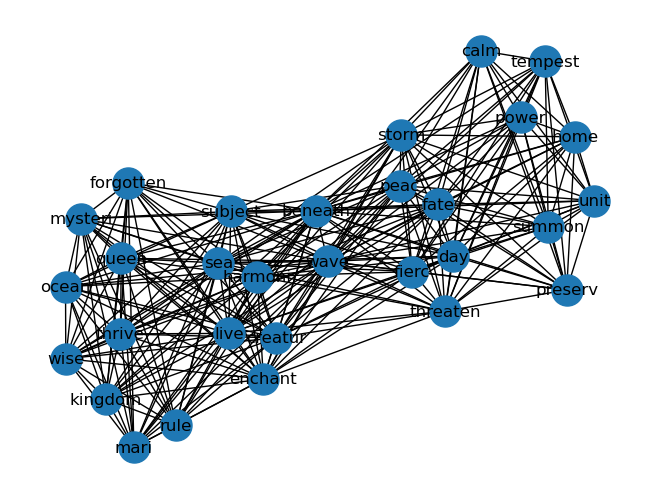

abstract_sCAKE_.txt


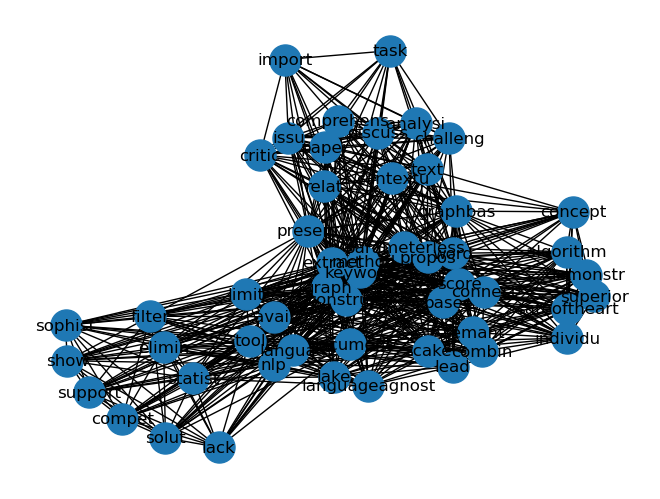

nakamura1997.txt


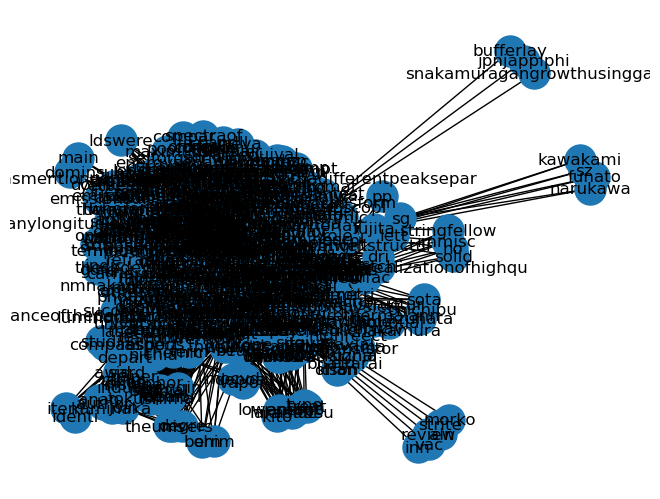

sCAKE_full_doc_.txt


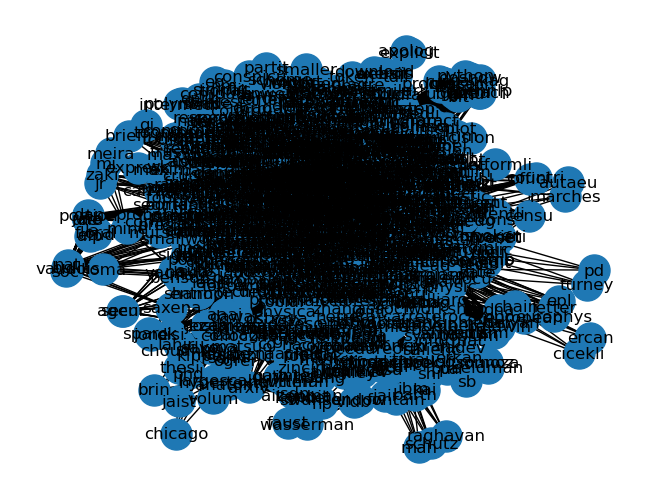

In [213]:
cwd = os.getcwd()
path = cwd
data_path = cwd + "/data/"
position_path = cwd + "/positions/"
create_folder(cwd, "graphs")
create_folder(cwd, "edgelists")

# Initialize PorterStemmer and read stopwords
ps = PorterStemmer()
stopwords = read_list_from_file(path, "stopwords.txt")

# Regular expressions to filter out unwanted content (Roman numerals, numbers, punctuation, etc.)
roman_num_ex = re.compile("\\b[i|v|x|l|c|d|m]{1,3}\\b")
numbers_ex = re.compile("[0-9]+(-[0-9]+)?")
punctuation_ex = re.compile("[^a-z ]")
newline_ex = re.compile("\n")

print("Create-graph-sCake")

# Loop through each file in the 'data' directory
for every_file in (os.listdir(data_path)):
    file_name = every_file[:-4]  
    print(every_file)
    
    # Load the corresponding term positions data (pre-processed earlier)
    with open(cwd + "/positions/" + file_name + ".pkl", 'rb') as f:
        df_pos = pd.read_pickle(f, compression=None)
    
    # Read the raw text file and clean it
    text = read_text_from_file(data_path, every_file)
    text = re.sub(newline_ex, ' ', text) 
    
    # Split text into sentences, combining two adjacent sentences into one document for context
    sen = convert_text_to_sentences(text)
    doc = []
    if len(sen) < 2:
        doc.append(sen[0])
    else:
        for i in range(len(sen) - 1):
            two_sen = sen[i] + ". " + sen[i + 1]
            doc.append(two_sen)
    
    # Clean the sentences by removing numbers, punctuation, Roman numerals, and stopwords
    corpus = []
    for sen in doc:
        new_sen = sen.strip().lower()
        new_sen = re.sub(numbers_ex, '', new_sen)
        new_sen = re.sub(punctuation_ex, '', new_sen)
        new_sen = re.sub(roman_num_ex, '', new_sen)
        
        sen_words = nltk.word_tokenize(new_sen)
        sen_words = [i for i in sen_words if i not in stopwords]
        sen_words = [ps.stem(w) for w in sen_words]
        corpus.append(' '.join(sen_words))
    
    # Extract words and create a sorted list of unique selected words
    words = df_pos["words"]
    selected_words = sorted(list(set(words)))
    
    # Create a document-term matrix using the cleaned corpus
    vectorizer = CountVectorizer(binary=True)
    X = vectorizer.fit_transform(corpus)

    # features = vectorizer.get_feature_names()        ##  "AttributeError: 'CountVectorizer' object has no attribute 'get_feature_names'" get_feature_names() has been deprecated 
    #  using get_feature_names_out() instead of get_feature_names()
    features = vectorizer.get_feature_names_out()
    # Keep only the selected words in the document-term matrix
    ind_dict = dict((k, i) for i, k in enumerate(features))
    ins = list(set(ind_dict) & set(selected_words))
    indices = [ind_dict[x] for x in ins]
    dtm = (X[:, indices]).todense()
    
    # Create a term-term matrix (TTM) to capture co-occurrence between terms
    ttm = np.transpose(dtm) * dtm
    np.fill_diagonal(ttm, 0)  # Remove self-loops by setting diagonal to 0
    
    
    df = pd.DataFrame(data=ttm)
    df.columns = ins
    df.to_pickle(cwd + "/graphs/" + every_file[:-4] + ".pkl")
    
    # Create a graph from the term-term matrix
    labels = dict((i, k) for i, k in enumerate(ins))
    G = create_graph_with_adjmat(ttm, labels)
    
    # Generate an edge list 
    edge_list = G.edges().data()
    edgelist = [(labels[line[0]], labels[line[1]], line[2]['weight']) for line in edge_list]
    
    df = pd.DataFrame(edgelist)
    df.to_csv(cwd + "/edgelists/" + every_file[:-4] + ".csv", sep='\t', header=False, index=False)

# 2. InfluenceEvaluation

In [214]:
from __future__ import division
! pip install igraph
from igraph import *
#from jgraph import *
import sys
import copy
import random
import numpy as np
import numpy.random as nprnd
import pandas as pd
import os
from read_write_create import *

In [215]:

def triangles(G,nodes=None):
    if nodes is None:
        nodes_nbrs = G.adj.items()
    else:
        nodes_nbrs= ( (n,G[n]) for n in G.nbunch_iter(nodes) )
    for v,v_nbrs in nodes_nbrs:
        vs=set(v_nbrs) -set([v])
        ntriangles=0
        for w in vs:
            ws=set(G[w])-set([w])
            ntriangles+=len(vs.intersection(ws))-2                           # checking for validity
        yield (v,len(vs),ntriangles)

def edge_support(G):
    neighbors=G.neighborhood()    #neighbors_iter
    nbrs=dict((v.index,set(neighbors[v.index])) for v in G.vs)
    support = {}
    for e in G.es:
        nod1,nod2 = e.source, e.target	
        nod1_nbrs = set(nbrs[nod1])-set([nod1])
        nod2_nbrs = set(nbrs[nod2])-set([nod2])
        sup = len(nod1_nbrs.intersection(nod2_nbrs))
        #G[nod1][nod2]['support'] = sup
        support[(nod1,nod2)] = sup
    #print ('support :', support)
    return support
        


In [216]:
def ktruss(G):   
    #G = G.simplify(combine_edges={"weight": "sum", "count":"sum"})    #assume graph is simple
    support = edge_support(G)
    edges=sorted(support,key=support.get)
    bin_boundaries=[0]
    curr_support=0
    for i,e in enumerate(edges):
        if support[e]>curr_support:
            bin_boundaries.extend([i]*(support[e]-curr_support))
            curr_support=support[e]
            
    edge_pos = dict((e,pos) for pos,e in enumerate(edges))
   
    truss={}         ## initial guesses for truss is support
    neighbors=G.neighborhood()    #neighbors_iter
    #print ('neighbors:', neighbors)
    nbrs=dict((v.index,(set(neighbors[v.index])-set([v.index]))) for v in G.vs)
    #nbrs=dict((v.index,set(neighbors[v.index])) for v in G.vs)
    #print ('nbrs:', nbrs)
    for e in edges:
      #print ('processing edge : ', e, 'support :', support[e], 'pos:', edge_pos[e])
      u,v =e[0], e[1]
      if not(u == v) :
        common_nbrs = set(nbrs[u]).intersection(nbrs[v])
        #print (u,v,'common_nbrs',common_nbrs)
        for w in common_nbrs:
            if (u,w) in support :             
               e1 = (u,w)
            else :
               e1 = (w,u)
            if (v,w) in support :
               e2 = (v,w)
            else:
               e2 = (w,v)
            pos=edge_pos[e1]
            if support[e1] > support[e] :
               bin_start=bin_boundaries[support[e1]]
               edge_pos[e1]=bin_start
               edge_pos[edges[bin_start]]=pos
               edges[bin_start],edges[pos]=edges[pos],edges[bin_start]
               bin_boundaries[support[e1]]+=1
            #print ('e1',e1,'support:',support[e1], 'pos:', pos, 'new pos:', edge_pos[e1])
            
            pos=edge_pos[e2]
            if support[e2] > support[e] :
               bin_start=bin_boundaries[support[e2]]
               edge_pos[e2]=bin_start
               edge_pos[edges[bin_start]]=pos
               edges[bin_start],edges[pos]=edges[pos],edges[bin_start]
               bin_boundaries[support[e2]]+=1
            #print ('e2',e2,'support:',support[e2], 'pos:', pos, 'new pos:', edge_pos[e2])
              
            support[e1] =  max(support[e], support[e1]-1)     
            support[e2] =  max(support[e], support[e2]-1)   
            
        truss[e] = support[e] + 2 
        nbrs[u].remove(v)
        nbrs[v].remove(u)
    #print ('Truss: ', truss)
    #print ('Sorted Truss: ', sorted(truss,key=truss.get))
    return truss
    
    
def getnodetrussness(graph):
    n = graph.vcount()
    ktrussdict = ktruss(graph)
    nodetruss = [0] * n
    for edge in graph.es:
      source = edge.source		
      target = edge.target
      if not (source == target) :
         t = ktrussdict[(source,target)]
      else:
         t = 0		  
      nodetruss[source] = max(nodetruss[source], t)
      nodetruss[target] = max(nodetruss[target], t)
    
    return nodetruss
    

In [217]:

def influencemeasure(graph):
    n = graph.vcount()
    degree = graph.degree()
    influence=[0] * n

    degree = graph.degree(mode='out')
    strength = graph.strength(weights = graph.es['weight'])
    if (sum(strength) == 0.0) :
       #print ('unweighted graph')
       graph.es['weight'] = [1.0] * graph.ecount()
       strength = graph.strength(weights = graph.es['weight'])
       
    vnames = [v["name"] for v in graph.vs]

    
    nodetruss = getnodetrussness(graph)
    maxtruss = max(nodetruss)
    entropy = [0] * n
    bridging = [0] * n
    diversity = [0] * n
    
    
    for v in graph.vs:
          ent = 0
          nbrtrusses = [nodetruss[w] for  w in graph.neighbors(v)]
          numneighbors = len(nbrtrusses)
          numclasses = len(set(nbrtrusses))
          if not(maxtruss-1) == 1:
          		ent = numclasses/maxtruss
          		
          entropy[v.index] = ent 
         
          bridging[v.index] = sum([strength[w] * nodetruss[w]  for w in graph.neighbors(v)])   
    influence = [1/(a*1.0) * b*(c+1) for a,b,c in zip(nodetruss,bridging,entropy)]   
    return influence, entropy, bridging, nodetruss


def SortedRankedToFile(graphname, vnames,centrality, measurename):
       #directory = inputdirectory+ graphname + "/"
       directory = outputdirectory
       #if not os.path.exists(directory):
           #os.makedirs(directory)
       n = len(vnames)
       data = zip(vnames,centrality)
       pddata =  pd.DataFrame(data, index=range(0,n), columns=["Name",measurename])
       #pddata.to_csv(directory + graphname +"."+measurename+".txt",index=False) 
       sortedcol = pddata.sort_values(by=measurename, ascending=False)
       sortedcol[measurename+'DenseRank'] = sortedcol[measurename].rank(method='dense',ascending=False)
       sortedcol[measurename+'MinRank'] = sortedcol[measurename].rank(method='min',ascending=False)
       outputfile = directory + graphname +".sortedranked."+measurename+".txt"
       #print (outputfile)
       sortedcol.to_csv(outputfile,index=False) 
       return


def getInfluence(graphname):
       
       g = mysrcdir + '/' + graphname
       #print (g)
       
       directory = outputdirectory+ graphname + "/"
       #if not os.path.exists(directory):
           #os.makedirs(directory)
 
       timingoutputfile = directory + graphname +".InfluenceTiming"
       os.remove(timingoutputfile) if os.path.exists(timingoutputfile) else None 
       
       graph = Graph.Read_Ncol(g,directed=False,weights=True)
       graph.vs.select(_degree = 0).delete()
    
       graph.es['weight'] = [1.0] * graph.ecount() 
       
       strength = graph.strength(weights = graph.es['weight'])
       if (sum(strength) == 0.0):
          graph.es['weight'] = [1.0] * graph.ecount()     #assign weight 1 to each edge
          strength = graph.strength(weights = graph.es['weight'])
      
       n = graph.vcount()
       m = graph.ecount()
       #print ('weighted graph n,m: ', len(graph.vs), len(graph.es))
      
       vnames = [v["name"] for v in graph.vs]
       vindices = [v.index for v in graph.vs]
       
       #Timings = {}  
       
       #print ('Computing Influence')
       #start_time = time.time()
       influence,entropy,influencebridging, nodetruss =  influencemeasure(graph)   
       #Timings["IF"] = time.time() - start_time 
       measurename = "IF"
       SortedRankedToFile(graphname,vnames,influence,'IF' )
       return          


def getTopK(whichfile,k=10):
    data = pd.read_csv(whichfile)  
    topk = data['Name'][:k]
    return topk


### Call

In [218]:

global outputdirectory, mysrcdir

cwd = os.getcwd()
create_folder(cwd,"SCScore")
outputdirectory = cwd +'/SCScore/'
mysrcdir = cwd + "/edgelists/"

print("InfluenceEvaluation")
myfiles = os.listdir(mysrcdir)
for f in myfiles:
    print(f)
    getInfluence(f)  
    

c:\Users\mayan\OneDrive\Desktop\sCAKE & LAKE\sCAKE-in-Python/SCScore
Creation of the directory c:\Users\mayan\OneDrive\Desktop\sCAKE & LAKE\sCAKE-in-Python/SCScore failed
InfluenceEvaluation
100_words.csv
1_test_sentence.csv
1_test_sentence_semantic.csv
200_words.csv
2_test_sentence_non_semantic.csv
400_words.csv
50_words.csv
abstract_scake.csv
abstract_sCAKE_.csv
nakamura1997.csv
sCAKE_full_doc_.csv
test_sent.csv


# 3. pyWord-score-with-PositionWeight-sCAKE

In [219]:
def invert_num(l):
    return [(1.0/x) for x in l if x!=0] # Invert the numbers in the list, avoiding division by zero

def get_node_weight(w, df_pos):
    # Calculate the weight of a word based on its positions in the DataFrame
    w_weight = 0  # Initialize weight to zero
    w_row = df_pos.loc[df_pos["words"] == w]  # Locate the row corresponding to the word

    if len(w_row["words"]) > 0:  # Check if the word exists in the DataFrame
        posi = list(w_row["positions"])[0]  # Get the positions of the word
        posi = posi[:-1]  # Remove the last position (if needed)
        
        if len(posi) > 0:  # Ensure there are positions to calculate weight
            w_weight = sum(invert_num(posi))  # Calculate the weight by summing the inverted positions
    
    return w_weight  



## ------ Main ------

In [220]:
global cwd, path, data_path

cwd = os.getcwd()
path = cwd
data_path = cwd + "/data"

create_folder(cwd,"SCScore_W")
word_score_path = cwd + "/SCScore/"

print("Word-score-with-PositionWeight-sCake")
for every_file in (os.listdir(data_path)):
    
    print(every_file)
    file_name = every_file[:-4]
    #text = read_text_from_file(data_path,every_file)
    
    f_wordScore = read_text_from_file(cwd+"/SCScore/",file_name+".csv.sortedranked.IF.txt")
    
    with open(cwd+"/positions/"+file_name+".pkl", 'rb') as f:
        df_pos = pd.read_pickle(f, compression=None)
        
    df = pd.read_csv(word_score_path + file_name  +".csv.sortedranked.IF.txt")
    words = df["Name"]
    wscore = df["IF"]
    
    node_weight = [0] * len(words)
    for index in range(len(words)):
        node_weight[index] = get_node_weight(words[index], df_pos)
    
    new_score = list(wscore * node_weight)
    
    data = dict()
    data["Words"] = words
    data["Old_WScore"] = wscore
    data["Position_Weight"] = node_weight
    data["SCScore"] = new_score
    new_df = pd.DataFrame(data=data)
    new_df = new_df.sort_values("SCScore",ascending=False)
    
    new_df.to_csv(cwd+"/SCScore_W/"+ file_name +"_ranked_list.csv")
     


c:\Users\mayan\OneDrive\Desktop\sCAKE & LAKE\sCAKE-in-Python/SCScore_W
Creation of the directory c:\Users\mayan\OneDrive\Desktop\sCAKE & LAKE\sCAKE-in-Python/SCScore_W failed
Word-score-with-PositionWeight-sCake
100_words.txt
1_test_sentence_semantic.txt
200_words.txt
2_test_sentence_non_semantic.txt
400_words.txt
50_words.txt
abstract_sCAKE_.txt
nakamura1997.txt
sCAKE_full_doc_.txt


# 4. Construct-keyphrases-sCAKE

In [221]:
# Clean the input text by removing unnecessary characters and normalizing it
def clean_text(text):
    
    text = text.strip()
    text = text.lower()
    
    numbers_ex = re.compile("[0-9]+(-[0-9]+)?")
    text = re.sub(numbers_ex, '', text)
    
    #hyphen_ex = re.compile("[-]")
    #text = re.sub(hyphen_ex, ' ', text)
    
    #punctuation_ex = re.compile("[^a-z- ]")
    punctuation_ex = re.compile("[^a-z ]")
    text = re.sub(punctuation_ex, '', text)
    
    words = nltk.word_tokenize(text)
    #words = [i for i in words if i not in stopwords]
    
    return list(set(words))

# Extract key phrases from a list of words by joining and splitting them.
def get_Predicted_KP_all(words_list):
    
    s = ' '.join(words_list)
    s = s.split("*")
    s = [x.strip() for x in s] 
    s = [x for x in s if x!='']
    s = list(set(s))
    return s



In [222]:
global cwd, path, data_path

cwd = os.getcwd()
path = cwd
data_path = cwd + "/data/"
word_score_w_path = cwd + "/SCScore_W/"
save_path = cwd + "/KP-Preds"
newline_ex = re.compile("\n")

create_folder(cwd,"KP-Preds")

print("Construct-keyphrases-sCake")
for every_file in (os.listdir(data_path)):
    
    print(every_file)
    file_name = every_file[:-4]
    
    text = read_text_from_file(data_path,every_file)
    text = re.sub(newline_ex, ' ', text)
    
    score_df = pd.read_csv(word_score_w_path + file_name  +"_ranked_list.csv")
    
    words = clean_text(text)
    
    pred_keys = list(score_df["Words"])
    pred_keys = pred_keys[:int(len(pred_keys)/3)]
    
    words = ["*" if word not in pred_keys else word for word in words]
    
    if(len(words)) > 0:
        pred_kp = get_Predicted_KP_all(words)
        
    pred_kp = list(set(pred_kp))
    write_list_to_file(save_path, file_name+"-all-one-third-L3.txt",pred_kp)
    

c:\Users\mayan\OneDrive\Desktop\sCAKE & LAKE\sCAKE-in-Python/KP-Preds
Creation of the directory c:\Users\mayan\OneDrive\Desktop\sCAKE & LAKE\sCAKE-in-Python/KP-Preds failed
Construct-keyphrases-sCake
100_words.txt
1_test_sentence_semantic.txt
200_words.txt
2_test_sentence_non_semantic.txt
400_words.txt
50_words.txt
abstract_sCAKE_.txt
nakamura1997.txt
sCAKE_full_doc_.txt


In [223]:
def present_results(predicted_kp, file_name):
    results_df = pd.DataFrame(predicted_kp, columns=['Predicted Key Phrases'])
    
    print(f"Predicted Key Phrases for {file_name}")
    display(results_df)


In [224]:
present_results(pred_kp, file_name)

Predicted Key Phrases for sCAKE_full_doc_


,Predicted Key Phrases
0,fscore
1,highlight
2,tic
3,support
4,span
...,...
166,search
167,windows
168,idea
169,krapivin


Other results are in KP-Preds folder,
"display_predicted_key_phrases" NOT PART of sCAKE Scripts 

In [225]:
def display_predicted_key_phrases(folder_path):
    
    files_data = []

    
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.txt'):
            
            file_base_name = os.path.splitext(file_name)[0]
            file_path = os.path.join(folder_path, file_name)
            
            # Read the content of the file
            with open(file_path, 'r', encoding='utf-8') as file:
                file_content = file.read()

            
            files_data.append([file_base_name, file_path, file_content])

    
    df = pd.DataFrame(files_data, columns=["File Name", "File Path", "File Content"])
    
    
    print("Predicted Key Phrases:\n")
    
    
    for index, row in df.iterrows():
        print(f"File Name: {row['File Name']}")
        print(f"File Path: {row['File Path']}")
        print(f"File Content:\n{row['File Content']}")
        print("-" * 80)



In [226]:
folder_path = r'KP-Preds'
display_predicted_key_phrases(folder_path)


Predicted Key Phrases:

File Name: 100_words-all-one-third-L3
File Path: KP-Preds\100_words-all-one-third-L3.txt
File Content:
town
alina
aurelia
tome
lost young
hidden spoke
eldoria
brave

--------------------------------------------------------------------------------
File Name: 1_test_sentence-all-one-third-L3
File Path: KP-Preds\1_test_sentence-all-one-third-L3.txt
File Content:
day
good
joy

--------------------------------------------------------------------------------
File Name: 1_test_sentence_semantic-all-one-third-L3
File Path: KP-Preds\1_test_sentence_semantic-all-one-third-L3.txt
File Content:
day
good

--------------------------------------------------------------------------------
File Name: 200_words-all-one-third-L3
File Path: KP-Preds\200_words-all-one-third-L3.txt
File Content:
ocean
lay
light
world
thrive
beneath
sky
leviathan
reach
life
tranquil
secret
sunlight
realm

--------------------------------------------------------------------------------
File Name: 2_test